<a href="https://colab.research.google.com/github/AbhishekAdarshMishra/Mobile_Gallary_image_classifier/blob/main/Mobile_Whatsapp_gallery_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/kaggle_dataset'

In [3]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


In [6]:
!ls

kaggle.json  sampleSubmission.csv  test       train	 valid
modelssv     sign		   test1.zip  train.zip


In [7]:
!mkdir mobile_gallary

In [8]:
cd mobile_gallary/

/content/gdrive/My Drive/kaggle_dataset/mobile_gallary


In [9]:
!kaggle datasets download -d n0obcoder/mobile-gallery-image-classification-data

 99% 857M/866M [00:14<00:00, 20.5MB/s]
100% 866M/866M [00:14<00:00, 61.2MB/s]


In [10]:
!unzip mobile-gallery-image-classification-data.zip

Archive:  mobile-gallery-image-classification-data.zip
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/dwight.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/house.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/mahabodhi_tree.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/maruti800.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/michael.jpeg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/modi_selfie.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/test/sachin_selfie.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/train/Cars/cars_000.jpg  
  inflating: mobile_gallery_image_classification/mobile_gallery_image_classification/trai

In [17]:
!ls

mobile_gallery_image_classification


In [15]:
!mv test /content/gdrive/MyDrive/kaggle_dataset/mobile_gallary

In [16]:
!mv train /content/gdrive/MyDrive/kaggle_dataset/mobile_gallary

In [18]:
!nvidia-smi

Thu Apr  1 18:41:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Organise Image**

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [20]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [29]:
%cd valid


/content/gdrive/My Drive/kaggle_dataset/mobile_gallary/valid


In [30]:
!mkdir Cars
!mkdir Memes
!mkdir Mountains
!mkdir Selfies
!mkdir Trees
!mkdir Whatsapp_Screenshots

In [32]:
os.chdir('/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train/Cars')
for i in random.sample(glob.glob('car*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test/Cars')      
for i in random.sample(glob.glob('car*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid/Cars')
    
os.chdir('/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train/Memes')
for i in random.sample(glob.glob('memes*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test/Memes')      
for i in random.sample(glob.glob('memes*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid/Memes')

os.chdir('/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train/Mountains')
for i in random.sample(glob.glob('mountains*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test/Mountains')      
for i in random.sample(glob.glob('mountains*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid/Mountains')

os.chdir('/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train/Selfies')
for i in random.sample(glob.glob('selfies*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test/Selfies')      
for i in random.sample(glob.glob('selfies*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid/Selfies')

os.chdir('/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train/Trees')
for i in random.sample(glob.glob('trees*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test/Trees')      
for i in random.sample(glob.glob('trees*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid/Trees')

os.chdir('/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train/Whatsapp_Screenshots')
for i in random.sample(glob.glob('whatsapp*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test/Whatsapp_Screenshots')      
for i in random.sample(glob.glob('whatsapp*'), 30):
    shutil.move(i, '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid/Whatsapp_Screenshots')
    


In [35]:
train_path = '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/train'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/valid'
test_path = '/content/gdrive/MyDrive/kaggle_dataset/mobile_gallary/test'

In [36]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 906 images belonging to 6 classes.
Found 180 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [37]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

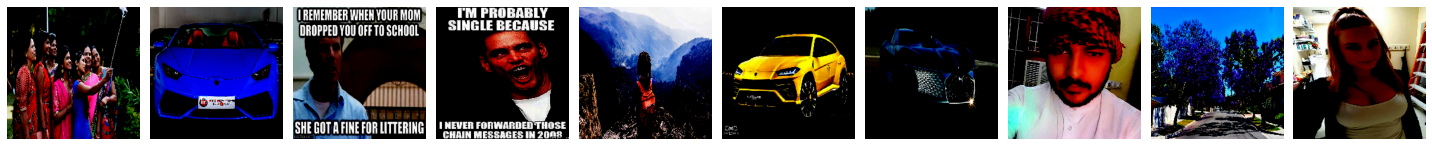

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [38]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)

In [39]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1204230   
Total params: 1,223,622
Trainable params: 1,223,622
Non-trainable params: 0
______________________________________________

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


91/91 - 58s - loss: 1.0210 - accuracy: 0.6247 - val_loss: 0.5944 - val_accuracy: 0.7889
Epoch 2/10
91/91 - 25s - loss: 0.4092 - accuracy: 0.8753 - val_loss: 0.4986 - val_accuracy: 0.8556
Epoch 3/10
91/91 - 25s - loss: 0.2543 - accuracy: 0.9238 - val_loss: 0.4563 - val_accuracy: 0.8556
Epoch 4/10
91/91 - 25s - loss: 0.1393 - accuracy: 0.9768 - val_loss: 0.5604 - val_accuracy: 0.8444
Epoch 5/10
91/91 - 25s - loss: 0.0839 - accuracy: 0.9879 - val_loss: 0.4994 - val_accuracy: 0.8833
Epoch 6/10
91/91 - 25s - loss: 0.0577 - accuracy: 0.9945 - val_loss: 0.4585 - val_accuracy: 0.8833
Epoch 7/10
91/91 - 24s - loss: 0.0370 - accuracy: 0.9978 - val_loss: 0.6097 - val_accuracy: 0.8500
Epoch 8/10
91/91 - 24s - loss: 0.0257 - accuracy: 0.9978 - val_loss: 0.4919 - val_accuracy: 0.8944
Epoch 9/10
91/91 - 25s - loss: 0.0169 - accuracy: 0.9989 - val_loss: 0.5097 - val_accuracy: 0.8778
Epoch 10/10
91/91 - 25s - loss: 0.0127 - accuracy: 0.9989 - val_loss: 0.5024 - val_accuracy: 0.8944


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

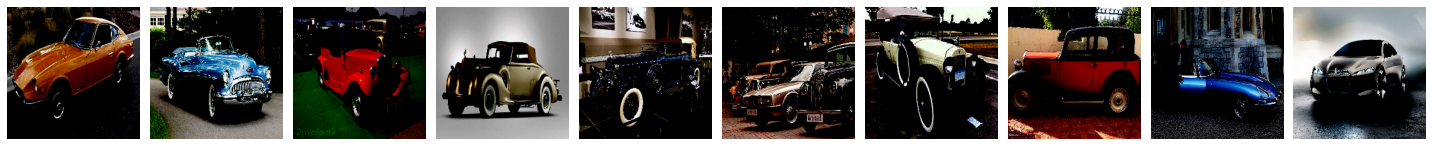

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [43]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [44]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [45]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [47]:
test_batches.class_indices

{'Cars': 0,
 'Memes': 1,
 'Mountains': 2,
 'Selfies': 3,
 'Trees': 4,
 'Whatsapp_Screenshots': 5}

Confusion matrix, without normalization
[[22  2  4  1  1  0]
 [ 0 24  0  5  1  0]
 [ 1  0 27  0  2  0]
 [ 1  0  2 26  1  0]
 [ 0  0  2  3 25  0]
 [ 0  0  0  0  0 30]]


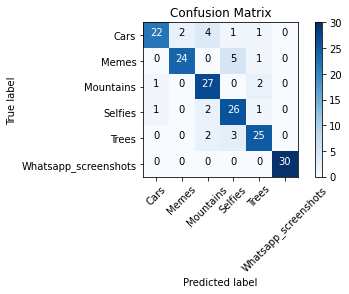

In [48]:
cm_plot_labels = ['Cars','Memes','Mountains','Selfies','Trees','Whatsapp_screenshots']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [53]:
%cd modelssv

/content/gdrive/My Drive/kaggle_dataset/modelssv


In [54]:
model.save('mobile_whatsapp_gallary_model.h5')

# **WEB API**

In [55]:
!pip install flask-ngrok

In [56]:
!pip install -U flask-cors

In [63]:
import base64
import numpy as np
import io
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from flask import request
from flask import jsonify
from flask import Flask
from flask_cors import CORS, cross_origin
from flask_ngrok import run_with_ngrok
from base64 import decodestring
app = Flask(__name__)

run_with_ngrok(app)
CORS(app)
cors = CORS(app,resources={
    r"/*":{
        "origins":"*"
    }
})

def get_model():
    global model
    model = load_model('/content/gdrive/MyDrive/kaggle_dataset/modelssv/mobile_whatsapp_gallary_model.h5')
    print(" * Model loaded!")

def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

print(" * Loading Keras model...")
get_model() #globally initiallised model for every where

@app.route("/predict", methods=["POST"])
@cross_origin()
def predict():
    message = request.get_json(force=True)
    encoded = message['image']
    encoded=encoded[23:]
    decoded = base64.b64decode(encoded)
    image = Image.open(io.BytesIO(decoded))
    processed_image = preprocess_image(image, target_size=(224, 224))

    prediction = model.predict(processed_image).tolist()
    prediction
    response = {
        'prediction': {
            'Cars': prediction[0][0],
            'Meme': prediction[0][1],
            'Mountains': prediction[0][2],
            'Selfies': prediction[0][3],
            'Trees': prediction[0][4],
            'Whatsapp_Screenshots': prediction[0][5]
        }
        
    }
    return jsonify(response)
app.run()

 * Loading Keras model...
 * Model loaded!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e6695ff26ab2.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [01/Apr/2021 20:35:56] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:37:33] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:37:45] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:37:58] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:39:07] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:39:41] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:39:56] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:41:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:41:18] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:41:37] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:41:59] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:42:11] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:42:33] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:42:48] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 20:43:17] "POST /pred